<a href="https://colab.research.google.com/github/RoAlro/IA-codes-projects/blob/main/Algoritmos_de_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORITMOS DE REGRESIÓN**

# **1. Importando Librerias**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import style
from scipy.stats import pearsonr

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn import metrics  #metrics for regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
warnings.filterwarnings('ignore')

# **2. Tarea 1**

## **2.1. Generar DATASET 2**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/aurea-soriano/ML-Datasets/master/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## **2.2 Cruce de variables para analizar correlaciones**

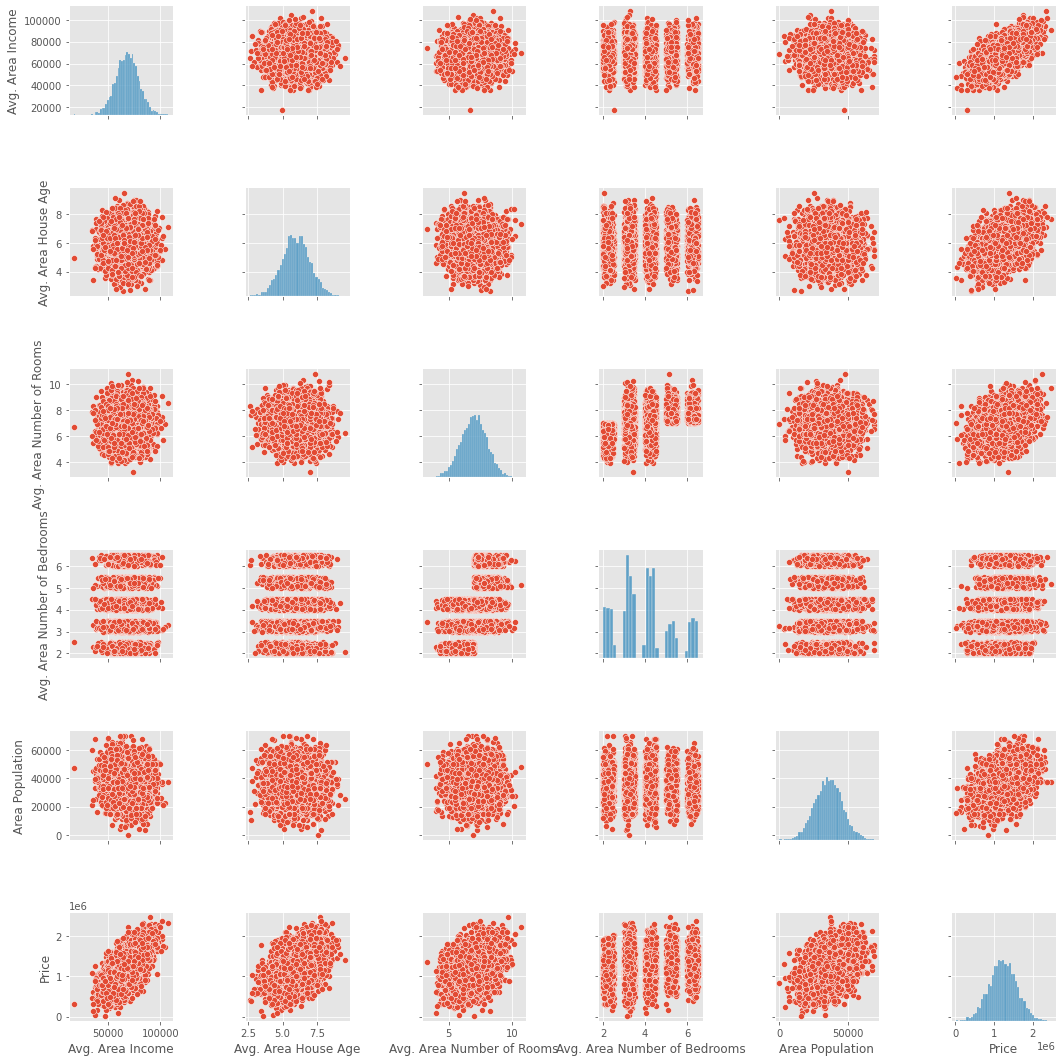

In [ ]:
sns.pairplot(df)

In [ ]:
#Matriz de correlacion
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


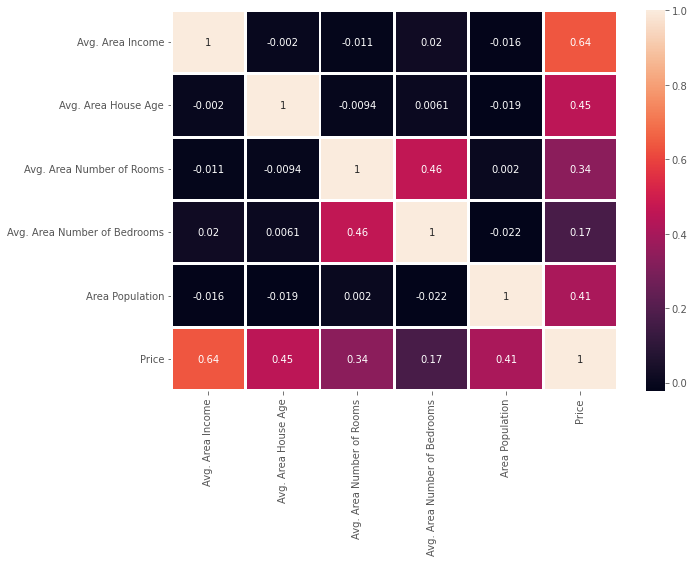

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [ ]:
corr_test = pearsonr(x = df['Avg. Area Income'], y =  df['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6397337782498939
P-value:  0.0


## **2.3 Preprocesando los datos**

In [ ]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
print('Número de columnas', len_feature, '\n Nombres: \n',l_column)

Número de columnas 7 
 Nombres: 
 ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']


In [ ]:
X=df.select_dtypes(include = np.number).copy()
X.drop(columns = ["Price"], inplace = True)
y = df["Price"]
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (5000, 5)
Tamaño de Variable Objetivo: (5000,)


In [ ]:
#**Coloque todas las características numéricas en X y el precio en y, ignore la dirección, que es una cadena para la regresión**
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (5000, 5)
Tamaño de Variable Objetivo: (5000,)


## **2.4 Usando SKLEARN (Tarea 1)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(5000,5),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8901.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:43:55   Log-Likelihood:                -51760.
No. Observations:                4000   AIC:                         1.035e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.637e+06   1.92e+04   -137.264      0.0

In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 102273.09125628172


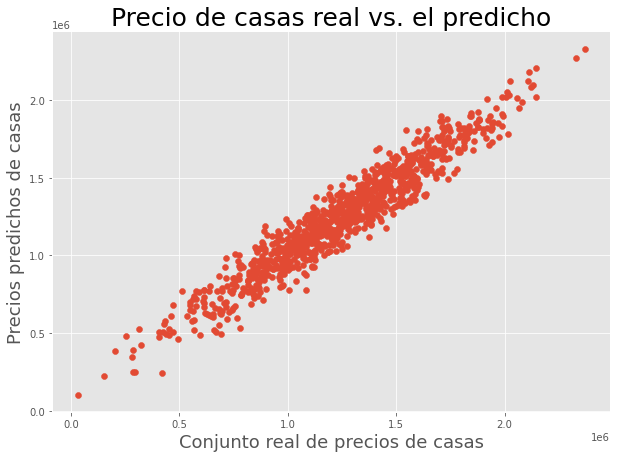

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Precio de casas real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de precios de casas",fontsize=18)
plt.ylabel("Precios predichos de casas", fontsize=18)
plt.scatter(x=y_test,y=predicciones)

# **3.TAREA 2**

## **3.1. Crear DATASET 3**

(50, 1)
(50, 1)


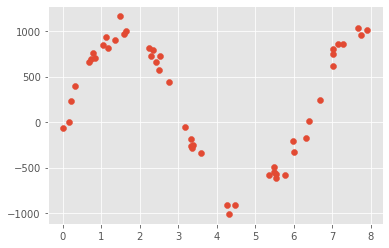

In [ ]:
rng = np.random.RandomState(1)
x = 8 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

#Create single dimension
X= x[:,np.newaxis]
y= y[:,np.newaxis]

inds = x.ravel().argsort()  # Sort x values and get index    
X = X.ravel()[inds].reshape(-1,1)
y = y[inds]*1000 #Sort y according to x sorted index

print(X.shape)
print(y.shape)

#Plot
plt.scatter(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size   = 0.8, random_state = 1234, shuffle = True)
X_train.shape

(40, 1)

## **3.2. Usando regresión Polinomial con SKLEARN (Tarea 2)**

### **3.2.1. Regresión con Polinomio de grado 1**

In [ ]:
polynomial_features= PolynomialFeatures(degree=1)
X_p = polynomial_features.fit_transform(X)
X_train_p = polynomial_features.fit_transform(X_train)
X_test_p= polynomial_features.fit_transform(X_test)

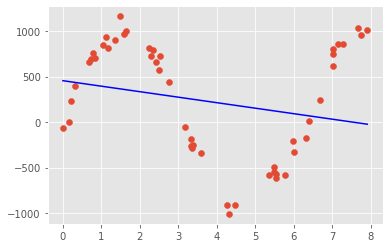

In [ ]:
model1 = LinearRegression()
model1.fit(X_train_p,y_train)
y_pred = model1.predict(X_p)

plt.scatter(X,y)
plt.plot(X,y_pred, "b")
plt.show()

In [ ]:
print("El término de intersección del modelo:", model1.intercept_)
print("Los coeficientes del modelo:", model1.coef_)

El término de intersección del modelo: [454.73657281]
Los coeficientes del modelo: [[  0.         -60.42895982]]


In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print (f'RMSE: {rmse}')
print (f'R2: {r2}')

RMSE: 612.5710007064333
R2: 0.034835782765013534


**3.2.1.1. INTERPRETACIÓN DE LOS RESULTADOS**


* De manera similar a lo visto en clase, al trabajar con un polinomio de grado 1, se obtiene una línea recta, la cual no es capaza de predecir el modelo correctamente; esto se puede ver reflejado en el R^2 cuyo valor es 0.034, este valor es muy lejano a 1 lo que indica que el polinomio elegido no es adecuado. Además este valor de R^2 se asemeja al valor obtenido usando stats models (R^2=0.30)



### **3.2.2. Regresión con Polinomio de grado 2**

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
X_p = polynomial_features.fit_transform(X)
X_train_p = polynomial_features.fit_transform(X_train)
X_test_p= polynomial_features.fit_transform(X_test)

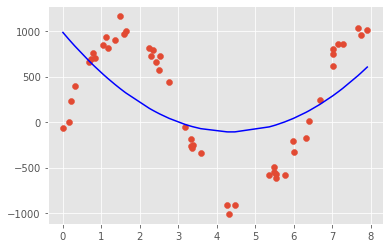

In [ ]:
model2 = LinearRegression()
model2.fit(X_train_p,y_train)
y_pred = model2.predict(X_p)

plt.scatter(X,y)
plt.plot(X,y_pred, "b")
plt.show()

In [ ]:
print("El término de intersección del modelo:", model2.intercept_)
print("Los coeficientes del modelo:", model2.coef_)

El término de intersección del modelo: [985.11877058]
Los coeficientes del modelo: [[   0.         -499.6330035    57.07613834]]


In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print (f'RMSE: {rmse}')
print (f'R2: {r2}')

RMSE: 511.58932001947204
R2: 0.32681987588032524


**3.2.2.1. INTERPRETACIÓN DE LOS RESULTADOS**


*   Ahora bien, si aumentamos el grado del polinomio a 2, ahora ya tenemos una curva, esto se puede saber a priorio debido a que la ecuación que describe a un polinomio de grado 2 es ax^2 + bx + c, cuya gráfica es una parábola; a partir de este conocimiento matemático se puede descartar al polinomio de grado 2 como posible solución. Sin embargo en este laboratorio se hizo la prueba con el fin de verificar mediante el indicador estadístico R^2 , el valor obtenido fue de 0.33, esto corrobora la suposición hecha con anterioridad ya que 0.33 está muy alejado de 1.






### **3.2.3. Regresión con Polinomio de grado 3**

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
X_p = polynomial_features.fit_transform(X)
X_train_p = polynomial_features.fit_transform(X_train)
X_test_p= polynomial_features.fit_transform(X_test)

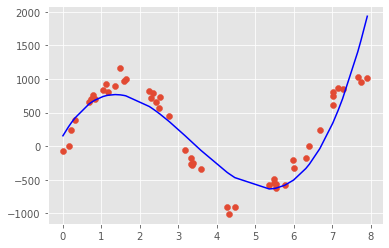

In [ ]:
model3 = LinearRegression()
model3.fit(X_train_p,y_train)
y_pred = model3.predict(X_p)

plt.scatter(X,y)
plt.plot(X,y_pred, "b")
plt.show()

In [ ]:
print("El término de intersección del modelo:", model3.intercept_)
print("Los coeficientes del modelo:", model3.coef_)

El término de intersección del modelo: [153.1184029]
Los coeficientes del modelo: [[   0.          984.42070823 -453.21567702   45.15545765]]


In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print (f'RMSE: {rmse}')
print (f'R2: {r2}')

RMSE: 293.3650356023609
R2: 0.7786369912537452


**3.2.3.1. INTERPRETACIÓN DE LOS RESULTADOS**


*   Con el polinomio de grado 3 ya se puede ir visualizando un acercamiento al comportamiento de los datos, sin embargo aún quedan muchos puntos muy alejados de la curva descrita por la regresión polinomial, esto también se corrobora con el valor de R^2=0.78, este valor indica que una regresión usando un polinomio de grado 3 explica mucho mejor el comportamiento de los datos, a diferencia de los polinomios de grado 1 y 2; de hecho este número también explica el comportamiento que se puede observar en la gráfica.


### **3.2.4. Regresión con Polinomio de grado 4**

In [ ]:
polynomial_features= PolynomialFeatures(degree=4)
X_p = polynomial_features.fit_transform(X)
X_train_p = polynomial_features.fit_transform(X_train)
X_test_p= polynomial_features.fit_transform(X_test)

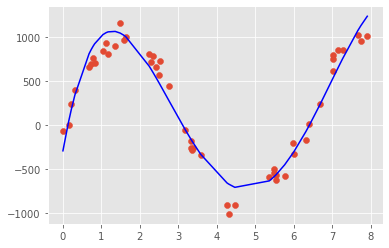

In [ ]:
model4 = LinearRegression()
model4.fit(X_train_p,y_train)
y_pred = model4.predict(X_p)

plt.scatter(X,y)
plt.plot(X,y_pred, "b")
plt.show()

In [ ]:
print("El término de intersección del modelo:", model4.intercept_)
print("Los coeficientes del modelo:", model4.coef_)

El término de intersección del modelo: [-293.50461813]
Los coeficientes del modelo: [[    0.          2439.68994443 -1343.91186067   225.79310298
    -11.60411862]]


In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print (f'RMSE: {rmse}')
print (f'R2: {r2}')

RMSE: 147.07699188490352
R2: 0.9443611912042443


**3.2.4.1. INTERPRETACIÓN DE LOS RESULTADOS**


*   Con el polinomio de grado 4 se obtienen los mejores resultados, ya que la regresión polinomial arroja un valor de R^2 = 0.944, prácticamente esta regresión está explicando casi todo el comportamiento de los datos, la visualización de la gráfica permite una mejor comprensión de esto, a diferencia de lo visto al usar un polinomio de grado 3 en este caso la curva pasa muy cerca de todos los puntos exceptuando unos pocos. 
Entonces si se debe hacer una selección acerca de cuál modelo usar para predecir estos datos, sin duda usar un polinomio de grado 4 es la mejor opción. Se puede seguir haciendo pruebas con polinomios de grado superior a 4 pero esto no es recomendable ya que se caería en overfitting 


